# Pratique des arbres de décision et hyper-paramètres optimaux

## Arbres de décision

La documentation Scikit-Learn sur les Arbres de Décision se trouve ici : http://scikit-learn.org/stable/modules/tree.html

Dans cette partie, nous allons utiliser un jeu de données classique, venant des bases de l'UCI.

Dans ce jeu de données, il est question de l'acceptabilité de voitures suivant 6 critères (donc nos données sont en dimension 6, auxquelles s'ajoute une septième correspondant à la classe).

Les 1726 données sont triées en 4 classes : non-acceptable (*unacc*), acceptable (*acc*), bonne (*good*), très bonnes (*vgood*). Pour plus de détail, la page web décrivant les données se trouve [ici](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).
### Récupération et préparation des données

Il nous faut dans un premier temps récupérer les données - disponibles sous la forme d'un .csv - (une ligne d'un notebook commançant par '!' autorise l'utilisation de n'importe quelle commande shell) :

In [1]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2021-11-25 11:20:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Résolution de archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Connexion à archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 51867 (51K) [application/x-httpd-php]
Enregistre : «car.data.1»

car.data.1          100%[===================>]  50,65K   164KB/s    ds 0,3s    

2021-11-25 11:21:00 (164 KB/s) - «car.data.1» enregistré [51867/51867]



Les données sont structurées de cette façon :

- une données pas ligne
- chaque ligne est composée des valeurs respectives pour chaque attribut, séparées par des virgules
- la dernière valeur est la classe



In [2]:
! cat car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

Avant de commencer, on peut analyser les données en regardant leurs caractéristiques :

<p>Nombre d'attribus: 6</p>
<p>Valeurs d'attribut manquantes : aucune</p>
<table>
<thead>
<tr>
<th>Attribut</th>
<th>Valeurs</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
<td>2, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
<td>2, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Nombre de données : 1728 </p>
<table>
<thead>
<tr>
<th>classe</th>
<th>Nombre</th>
<th>Nombre[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
<td>1210</td>
<td>70.023 %</td>
</tr>
<tr>
<td>acc</td>
<td>384</td>
<td>22.222 %</td>
</tr>
<tr>
<td>good</td>
<td>69</td>
<td>3.993 %</td>
</tr>
<tr>
<td>v-good</td>
<td>65</td>
<td>3.762 %</td>
</tr>
</table>
<p>Nous avons donc des données très déséquilibrées au niveau des classes.</p>
<p>Pour pouvoir travailler avec, il nous faut commencer par mettre les données dans un format utile à scikit-learn :</p>

In [4]:
import numpy as np

nom_attributs = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
# Récupération des données sous forme de strings :
donnees = np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")
X_string = donnees[:, :-1]

# Transformation en flottants
from sklearn.preprocessing import OrdinalEncoder
codage = OrdinalEncoder()
codage.fit(X_string)
X = codage.transform(X_string)
X = X.astype(int) #transformation des flottants en entiers 
print(X_string)

[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]


La variable X_string contient les données toutes décrites par des chaînes de caractères, alors qu'il s'agit typiquement d'attributs ordinaux. Nous allons donc utiliser le transformeur spécifiqueaux données ordinales, pour les les associer à des valeurs entières. Il s'agit de ``OrdinalEncoder`` dans le package ``sklearn.preprocessing``. 

**Q1** Lire la documentation et utiliser ce transformeur pour coder ``X_string`` vers un tableau ``X`` d'entiers.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
codage = OrdinalEncoder()
codage.fit(X_string)
X = codage.transform(X_string)
X = X.astype(int) #transformation des flottants en entiers 
print(X_string)

[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]


**Q2** Faire de même avec les classes pour obtenir un vecteur *y* d'entiers. 

In [6]:
# A vous
import numpy as np
Y_string = donnees[:,-1].reshape(-1,1)
codage.fit(Y_string)
Y= codage.transform(Y_string)
Y= Y.astype(int)

print(Y)

[[2]
 [2]
 [2]
 ...
 [2]
 [1]
 [3]]


**Q3** Faire de même avec les classes pour obtenir un vecteur *y* d'entiers. 

### Apprentissage d'arbres de décision
#### Mise en place
Maintenant qu'elles ont un format acceptable par scikit-learn, nous allons estimer une première fois le score de bonne classification (ou le taux d'erreurs). Nous allons utiliser la classe ``sklearn.tree.DecisionTreeClassifier`` qui contient tout ce qui est nécessaire pour la classification supervisée à l'aide d'arbres de décision. Vous trouverez sa documentation là : http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

A utiliser sans modération !

**Q4** Ecrire le code python permettant d'évaluer grossièrement le score de bonne classification d'une arbre de décision avec les paramètres par défaut de la classe ``DecisionTreeClassifier``, avec la méthode du hold-out 70/30.

In [7]:
# A Vous
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier(random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=42)
clf.fit(X_train,Y_train)
print(clf.score(X_test,Y_test))

0.9710982658959537


**Q5** Réitérer 10 fois cette expérience, en prenant soin de changer le train-test-splità chaque fois : nous éprouvons ici la stabilité de l'estimateur. Indiquer la moyenne du score obtenu sur les 10 expériences.

In [8]:
# A vous
somme=0
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=i)
    clf.fit(X_train,Y_train)
    somme += clf.score(X_test,Y_test)
    print(clf.score(X_test,Y_test))
moyenne= somme/10
print("la moyenne des scores est ",moyenne)

0.9691714836223507
0.9691714836223507
0.9595375722543352
0.9730250481695568
0.9788053949903661
0.9730250481695568
0.9730250481695568
0.9826589595375722
0.9691714836223507
0.976878612716763
la moyenne des scores est  0.9724470134874761


**Q6** On estime maintenant ce score de bonne classification  à l'aide de la validation croisée 10 folds. 

In [9]:
# A vous
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, cv=10)
scores
mean=0
for i in range(len(scores)):
    mean += scores[i]
mean /= len(scores)
mean

0.8635334050275574

L'estimateur moyenné par hold-out et celui obtenu par validation croisée sont-ils proches ?

In [ ]:
# par hold out on une moyenne de 0.9724470134874761 et par validation croisée, elle est de 0.8635334050275574. Ces valeurs ne nous semble pas très proches.

#### Affichage

L'avantage des arbres de décision, c'est qu'ils offrent une représentation graphique. Mais pour pouvoir l'aficher, il va nous falloir installer 2 packages supplémentaires :

In [10]:
!pip3 install pydotplus --user
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable


Nous pouvons alors afficher l'arbre appris. Comme nous aurons besoin souvent d'afficher un arbre, nous créons une fonction :

In [12]:

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

def affiche_arbre(classifieur, nom_attributs):
    dot_data = export_graphviz(classifieur,
                            feature_names=nom_attributs,
                            out_file=None,
                            filled=True,
                            rounded=True)
    return pydotplus.graph_from_dot_data(dot_data)

Voyons un tel arbre s'afficher. Pour cela, nous devons apprendre un arbre (en effet, jusque là, nous n'avons fait des apprentissages que dans l'objectif d'estimer les performances du paramétrage par défaut de la classe).

**Q7** Produire le code permettant d'apprendre un arbre à partir de toutes les données disponibles dans l'échantillon. Appelons le ``arbre_base``

In [13]:
# A vous

arbre_base = clf

Nous pouvons maintenant le visualiser en utilisant la séquence d'instructions:

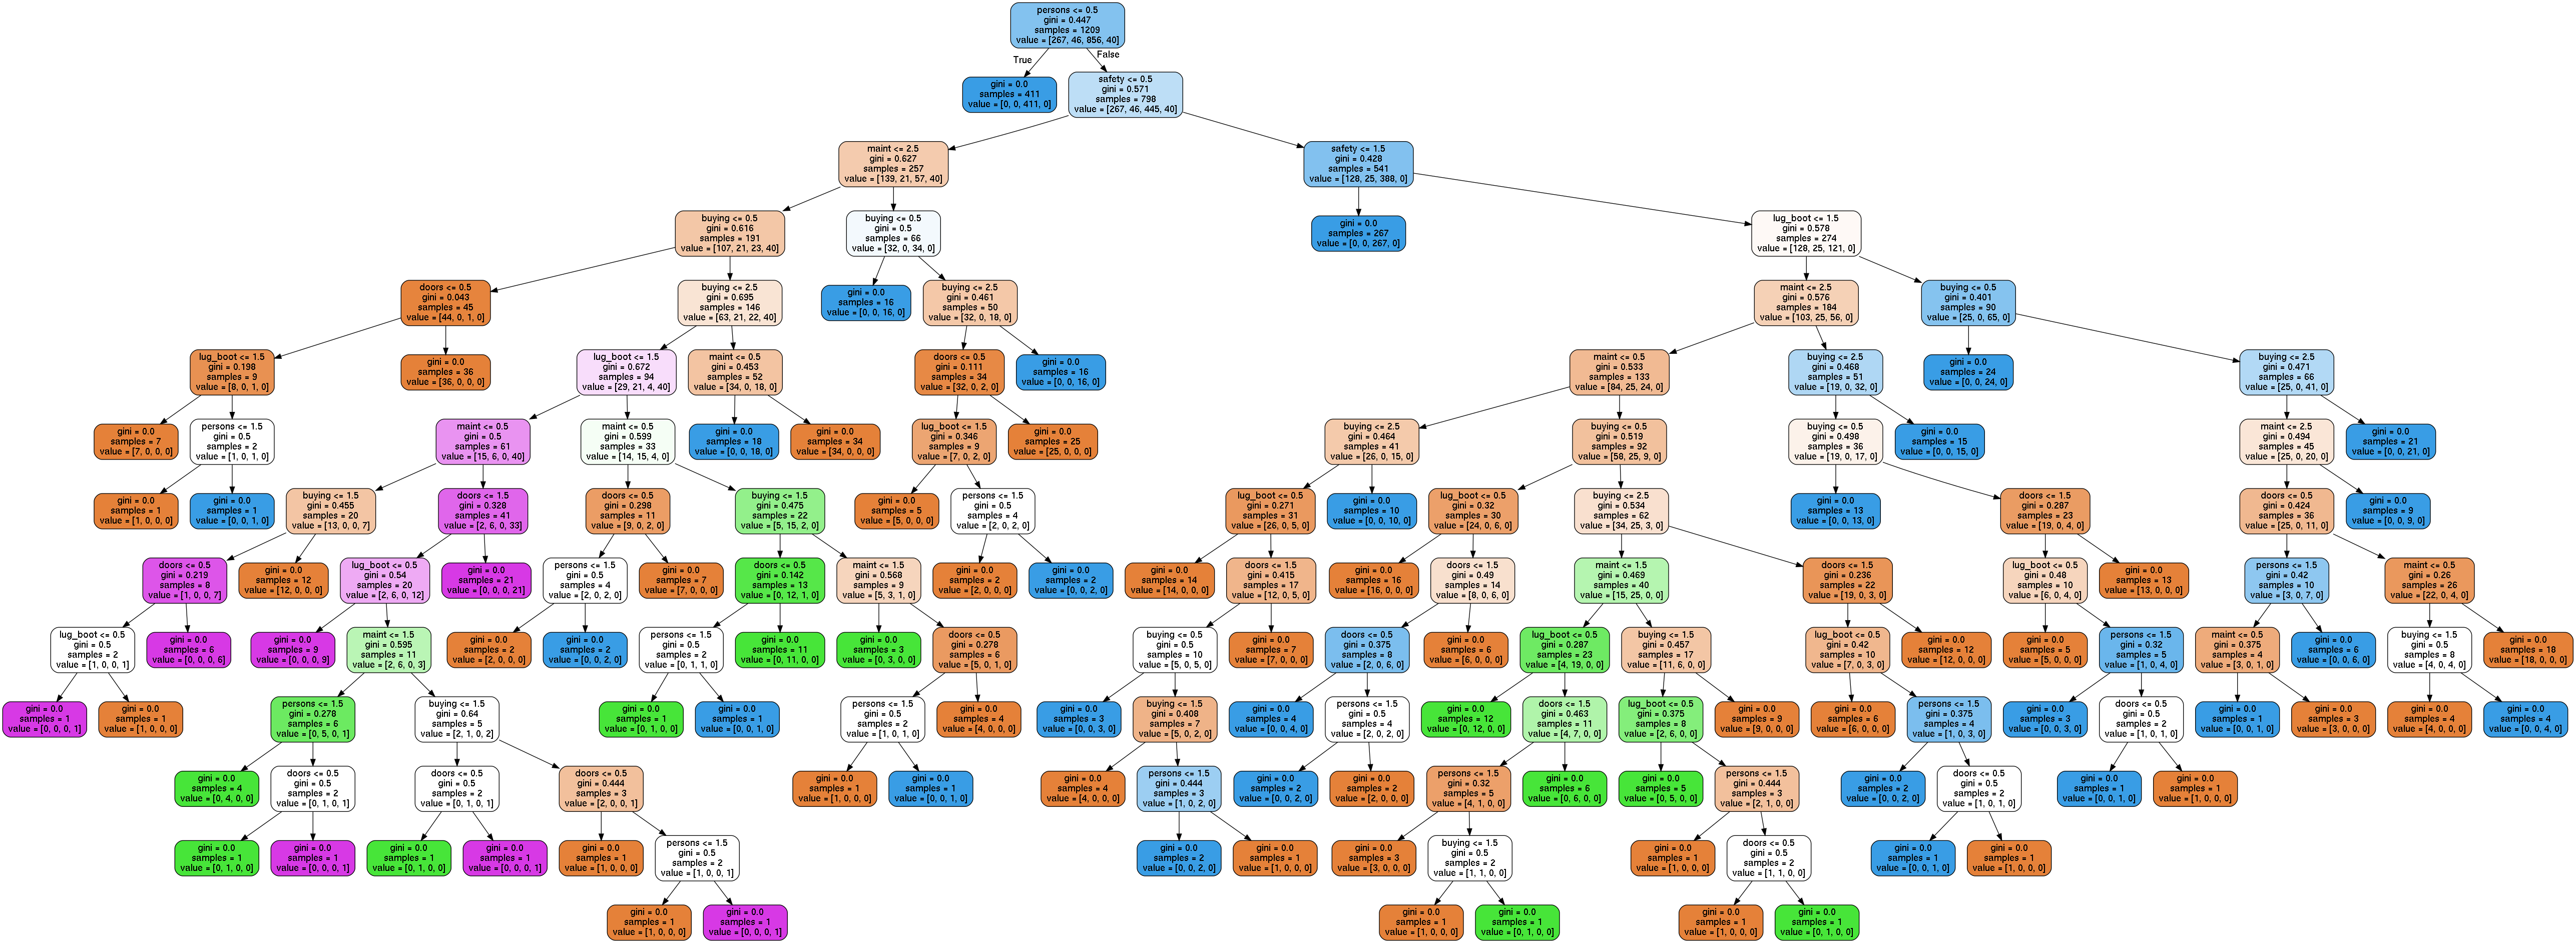

In [14]:
dessin_arbre = affiche_arbre(arbre_base, nom_attributs) 
Image(dessin_arbre.create_png())

### Validation croisée (et retours des Digits)

Si vous avez été curieux, vous avez peut-être déjà tester ça :

In [15]:
arbre_base

DecisionTreeClassifier(random_state=42)

Il y a donc plus de 10 (hyper)-paramètres d'initialisation pour le classifieur. On se propose d'étudier l'impact de 3 d'entre eux  sur l'apprentissage :
- *criterion* qui par défaut vaut 'gini' mais peut-valoir aussi 'entropy'
- *max_depth* qui permet d'élaguer l'arbre en arrêtant l'appel récursif de l'algorithme d'apprentissage quand le noued courant est à cette profondeur
- *max_leaf_nodes* qui élague aussi l'arbre en ne gardant au maximum que ce nombre de feuilles (celles les plus pures, c'est à dire avec le moins de données de différentes classes)

Les données sur les voitures étant trop simples pour apprécier la puissance des arbres de décision, nous allons en utiliser un autre : les *digits* du second TP. Le critère de performance que nous observerons par la suite est le **F1-score**.

In [16]:
# A vous

from sklearn.datasets import load_digits  
digits = load_digits()
X = digits.data
Y = digits.target
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


**Q8** Grâce à un hold-out 70/30, procéder à une première estimation grossière du F1-score d'un arbre de décision sur les données digits, en utilisant encore une fois le (hyper-)paramétrage par défaut de sklearn.

In [17]:
# A vous 
from sklearn.metrics import f1_score
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,Y_train)
Y_predict = clf.predict(X_test)

F1_score= f1_score(Y_test,Y_predict,average=None)
print(F1_score)




(1797, 64)
(1797,)
[0.91428571 0.75728155 0.78651685 0.81415929 0.82926829 0.890625
 0.93457944 0.8440367  0.825      0.81300813]


Maintenant que nous avons mesuré la qualité pour les valeurs par défaut des paramètres, nous allons réaliser de la **validation-croisée** sur l'ensemble d'apprentissage (*train*). Une fois qu'on aura trouvé les meilleures valeurs d'hyper-paramètres pour nos trois arguments choisi, on terminera par apprendre un arbre sur un sous-ensemble de l'échantillon d'apprentissage avec ces paramètres, on viosualisera l'arbre et on évaluera la qualité de cet apprentissage final sur l'ensemble de test.

On commence par évaluer l'impact du critère de choix du test (*criterion*) :

In [18]:
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(random_state=42)
reussite_gini = cross_val_score(clf_gini, X_train, Y_train, cv = 10)
f1_gini = cross_val_score(clf_gini, X_train, Y_train, cv = 10, scoring='f1_macro')
print("Pour le gini :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_gini.mean(), reussite_gini.std(), f1_gini.mean(), f1_gini.std()) )

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
reussite_entropy = cross_val_score(clf_entropy, X_train, Y_train, cv = 10)
f1_entropy = cross_val_score(clf_entropy, X_train, Y_train, cv = 10, scoring='f1_macro')
print("Pour l'entropie :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_entropy.mean(), reussite_entropy.std(), f1_entropy.mean(), f1_entropy.std()) )

Pour le gini :
 	 taux de réussite : 0.844102 (+/-) 0.024983
       	 F-score (global) : 0.843556 (+/-) 0.023918
 
Pour l'entropie :
 	 taux de réussite : 0.852038 (+/-) 0.033138
       	 F-score (global) : 0.850469 (+/-) 0.033004
 


Qu'en déduire ? Est-ce que l'entropie est statistiquement meilleure sur ce jeu de données ? 

**Q9** Il faut maintenant regarder l'impact des 2 autres paramètres : 
- *max_depth* que l'on fera varier entre entre 1 et 20
- *max_leaf_nodes* qu'on veut faire varier entre 10 et 210 par paliers de 20 (c'est-à-dire 10, 30, .., 210).
On se propose d'étudier l'impact de ces paramètres de manière indépendante, avec l'entropie comme critère de sélection.

Il faudra produire 2 courbes montrant les évolutions du taux de réussite et du F1-score global avec chacun des hyper-paramètres. Il faudra aussi faire apparaitre l'écart type sur sur les courbes : l'utilisation de la fonction pyplot *errorbar* (https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) est vivement conseillée.

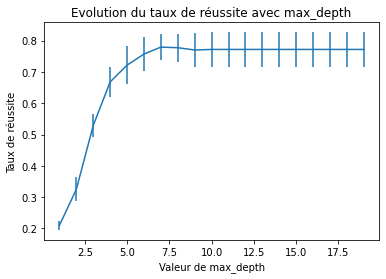

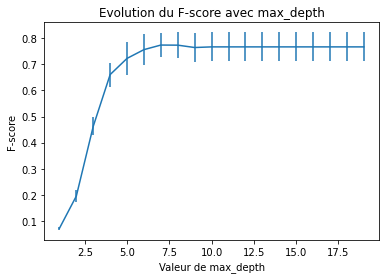

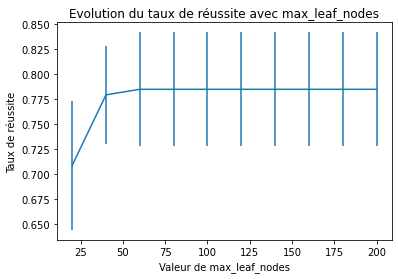

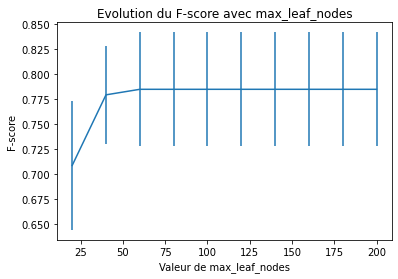

In [34]:
# A vous
import matplotlib.pyplot as plt
# Puis : Commande uniquement Notebook : permet l'affichage des courbes
%matplotlib inline     

# Max_depth
max_depths = range(1,20)
reussite_md =[]
reussite_md_std = []
f1_md = []
f1_md_std = []

# Cross-validation pour chaque valeur
for i in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=i)
    reussite_md_cv = cross_val_score(clf, X_train, Y_train, cv = 10)
    reussite_md.append(reussite_md_cv.mean())
    reussite_md_std.append(reussite_md_cv.std())
    
    f1_md_cv = cross_val_score(clf, X_train, Y_train, cv = 10, scoring='f1_macro')
    f1_md.append(f1_md_cv.mean())
    f1_md_std.append(f1_md_cv.std())

# Affichage    
plt.figure()
plt.errorbar(np.array(max_depths), np.array(reussite_md), yerr=np.array(reussite_md_std))
plt.title("Evolution du taux de réussite avec max_depth")
plt.xlabel("Valeur de max_depth")
plt.ylabel("Taux de réussite")
plt.show()

plt.figure()
plt.errorbar(np.array(max_depths), np.array(f1_md), yerr=np.array(f1_md_std))
plt.title("Evolution du F-score avec max_depth")
plt.xlabel("Valeur de max_depth")
plt.ylabel("F-score")
plt.show()

mln = range(20,201,20)
reussite_mln =[]
reussite_mln_std = []
f1_mln = []
f1_mln_std = []

# Cross-validation pour chaque valeur
for i in mln:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_leaf_nodes=i)
    reussite_mln_cv = cross_val_score(clf, X_train, Y_train, cv = 10)
    reussite_mln.append(reussite_mln_cv.mean())
    reussite_mln_std.append(reussite_mln_cv.std())
    
    f1_mln_cv = cross_val_score(clf, X_train, Y_train, cv = 10, scoring='f1_micro')
    f1_mln.append(f1_mln_cv.mean())
    f1_mln_std.append(f1_mln_cv.std())

# Affichage    
plt.figure()
plt.errorbar(np.array(mln), np.array(reussite_mln), yerr=np.array(reussite_mln_std))
plt.title("Evolution du taux de réussite avec max_leaf_nodes")
plt.xlabel("Valeur de max_leaf_nodes")
plt.ylabel("Taux de réussite")
plt.show()

plt.figure()
plt.errorbar(np.array(mln), np.array(f1_mln), yerr=np.array(f1_mln_std))
plt.title("Evolution du F-score avec max_leaf_nodes")
plt.xlabel("Valeur de max_leaf_nodes")
plt.ylabel("F-score")
plt.show()

**Q10** En déduire les valeurs optimales des 3 hyper-paramètres conjointement et les utiliser pour apprendre puis tester un arbre de décision avec ces valeurs, à l'aide d'un hold out 70/30. 

In [69]:
# A vous
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = None, max_depth = 9, random_state=42)
reussite = cross_val_score(clf, X_train, Y_train, cv = 10)
f1 = cross_val_score(clf, X_train, Y_train, cv = 10, scoring='f1_macro')
print(reussite.mean(), reussite.std(), f1.mean(), f1.std() )
clf=clf.fit(X_train, Y_train)
arbre_base = clf


0.7700559049615653 0.05407636832875827 0.76397224997225 0.054598662420745125


**Q11** Visualiser l'arbre obtenu.

In [70]:
# A vous
#dessin_arbre = affiche_arbre(arbre_base,nom_attributs) 
#Image(dessin_arbre.create_png())

## Grille de recherche

Il existe des procédés de recherche automatique des meilleurs hyper-paramètres d'un algorithme d'apprentissage, pour un échantillon donné. Le plus connu est la grille de recherche associée à la validation croisée : ``GridSearchCV``, qui permet d'obtenir la meilleure de toutes les combinaisons des hyper-paramètres à estimer (ici: entropie ou gini, profondeur maximum et nombre maximum de feuilles). 

**Q12** Quelle est l'instruction d'import pour disposer de cette classe qui vous simplifiera la vie ?

In [71]:
from sklearn.model_selection import GridSearchCV

Il est nécessaire d’indiquer dans un « dictionnaire » quels sont les hyper-paramètres dont on souhaite explorer les valeurs (pour trouver les optimales au sens d'un critère de performance) et quelles sont les différentes valeurs à évaluer. Chaque entrée du dictionnaire consiste en une chaîne de caractères qui contient le **nom de l’hyper-paramètre** tel qu’il est défini dans la classe implantant l’estimateur employé sous sklearn.

Par exemple, dans l'algorithme des $k$-plus proches voisins, les hyper-paramètres à optimiser peuvent être $k$ et la distance pour calculer la similarité entre exemples. Cela donnerait, comme dictionnaire de recherche en grille (nous reconnaissons les noms des paramètres de la classe KNearestNeighbors):

In [72]:
tuned_parameters = {'n_neighbors':[2, 5, 10, 15],
                    'p':   [0.5, 1, 2, 5, 8, 12]}

Evidemment, la plage de valeurs que chaque hyper-paramètre peut prendre peut être fournie autrement que de la façon énumérative comme ci-dessus (il suffit que le domaine spécifié de valeurs soit itérable: une liste, un tableau, etc.).

**Q13** Donner le code qui permet de spécifier le dictionnaire de recherche propre à l'optimisation des hyper-paramètres des arbres de décisions à apprendre sur les donnés digits.

In [73]:
# A vous
tuned_parameters = {'criterion':['gini', 'entropy'],
                    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                    'max_leaf_nodes':[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210]}

Dans la création de l'instance de ``GridSearchCV`` nous pouvons ensuite indiquer pour ``DecisionTreeClassifier`` des arguments qui seront communs (fixes) pour chaque entraînement, par exemple nous pouvons fixer l'hyper-paramètre ``min_samples_split`` à 1 (au lieu de la valeur par défaut à 2). 

De façon générale, le data scientist peut fixer tout hyper-paramètre $\alpha$ propre à un algorithme, et une fois fixé, chercher la meilleure combinaison des autres $\alpha$ fixe. Bien évidemment, il est possible de figer plusieurs autres hyper-paramètres, pour chercher à en optimiser d'autres. 

In [74]:
select_hppmt = GridSearchCV(DecisionTreeClassifier(min_samples_split=2), tuned_parameters, cv=5)

**Q14** Si vous avez bien lu l'énoncé, qu'indique l'argument ``cv`` dans l'appel ci-dessus ? Si vous ne pouvez pas répondre à cette question, c'est que vous avez lu trop vite le début de cet exercice : recommencez.

Quand scikit-learn cherche à interpréter l'expressions suivante :

``select_hppmt.fit(X_train, y_train)``

Alors les actions suivantes sont réalisées :

- à partir des listes de valeurs pour les différents (hyper)paramètres,  sont générées toutes les combinaisons de valeurs
- pour chaque combinaison, les performances des modèles correspondants sont évaluées par validation croisée 5-fold (appliquée uniquement sur les données d’apprentissage X_train, y_train),
- sont sélectionnées les valeurs des (hyper)paramètres correspondant aux meilleures performances de validation croisée,
- avec ces valeurs pour les (hyper)paramètres un nouvel apprentissage est réalisé avec la totalité des données de X_train, y_train (et non seulement k− 1k folds).

Les lignes suivantes permettent d’afficher les résultats : les paramètres du meilleur modèle avec ``best_params_``, ainsi que les résultats de validation croisée obtenus pour toutes les combinaisons de valeurs pour les (hyper)paramètres (``cv_results_``) donne accès à ces informations et à bien d’autres).

In [66]:
#print(select_hppmt.best_params_)
#print(select_hppmt.cv_results_)

select_hppmt.fit(X_train, Y_train)
print(select_hppmt.best_params_)



{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 130}


**Q15** combien d'arbres ont été appris au total pour faire cette grid-search?

In [67]:
# A vous (exploration de cv results)

keys = select_hppmt.cv_results_.keys()
rts = select_hppmt.cv_results_.get('rank_test_score')

print(len(rts))

440


L’aspect des résultats vous incite à affiner la grille ? 

**Q16** Modifiez la grille, relancez une GridSearchCV et examinez les nouveaux résultats.
(Il faut affiner les valeurs cibles des hyper-paramètres optimaux, en recentrant leurs domaines de valeurs autour des meilleures)

In [ ]:
# A vous

**Q17** Maintenant que les meilleurs hyper-paramètres ont été obtenus (pour cet algo et ce jeu de données), écrire le code pour apprendre l'arbre de décision optimal, sur tout le jeu de données, et pour le visualiser. 

In [ ]:
# A vous

**Pour les curieux (hors rendu)** Il existe d'autres méthodes pour chercher les hyper-paramètres, notamment les recherches aléatoires d'hyper-paramètres.

Se documenter sur ``RandomizedSearchCV``. Le « budget » (nombre total de combinaisons évaluées) peut être fixé avec n_iter. Motivez le choix des lois employées pour le tirage des valeurs des deux (hyper)paramètres  (les distributions peuvent être choisies dans cette liste de scipy.stats.). Adapter le code précédent pour cet autre type de recherche d'hyper-paramètres optimaux, en comparant temps d'exécution de la grid search (et/ou nombre d'arbrers appris) et qualité des résultats.

In [ ]:
# A vous